# Data Acquisition

Install the following necessary packages

In [1]:

#pip install pandas
#pip install numpy
#pip install scipy
#pip install yahoo_finance_api2
#pip install pandas-datareader
#pip install ta
#pip install seaborn
#pip install sklearn
#conda install tensorflow


In [2]:
import pandas as pd
import numpy as np

# Importing tickers/Symbols field from the scrapped stockdata

df = pd.read_csv('/home/nielit/Desktop/datasample.csv',header=None)
df.columns=["ticker"]
df.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,ticker
0,RELIANCE.NS
1,RELIANCE.BO
2,TCS.NS
3,TCS.BO
4,HDFCBANK.NS


In [3]:
len(df.ticker)

1981

In [4]:
len(df.ticker.unique())

1980

In [5]:
# Check for duplicate values

df_dup = df[df.duplicated()]
df_dup

,ticker
300,JINDALSTEL.BO


In [6]:
# Drop the duplicate values

df = df.drop(df.index[300])

In [7]:
tic = list(df.ticker)

In [8]:
# Import necessary packages

import pandas_datareader as pdr
from datetime import datetime

In [9]:
from tqdm import tqdm

In [10]:
# Collecting the stock market data from open source yahoo finance API for the following stock tickers for past 2 years

data = list()
for i in tqdm(tic):
    try:
        data.append(pdr.get_data_yahoo(symbols=i, start=datetime(2018, 1, 2), end=datetime(2019, 12, 31)))
    except:
        pass

100%|██████████| 1980/1980 [57:10<00:00,  1.24s/it] 


In [11]:
for i in range(len(data)):
    
    data[i]['Symbol'] = tic[i]

In [12]:
df = pd.DataFrame(data[0])

for i in np.arange(1,len(data)):
    df = df.append(data[i])

In [13]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Symbol       0
dtype: int64

Our required dataframe df looks something like this..

In [14]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,Symbol
Date,,,,,,,
2018-01-02,919.549988,906.400024,913.000000,911.150024,4342815.0,900.578369,RELIANCE.NS
2018-01-03,926.000000,913.049988,925.000000,914.799988,6175312.0,904.185974,RELIANCE.NS
2018-01-04,921.799988,915.700012,918.150024,920.299988,4118581.0,909.622131,RELIANCE.NS
2018-01-05,926.900024,920.250000,921.799988,923.250000,3401905.0,912.537903,RELIANCE.NS
2018-01-08,931.000000,923.500000,926.099976,928.549988,4035417.0,917.776428,RELIANCE.NS


In [15]:
# Saving the dataframe in local

df.to_csv("/home/nielit/Desktop/StockData2.csv")

In [16]:
# Loading the dataframe back from local 

df_stock = pd.read_csv("/home/nielit/Desktop/StockData2.csv")

In [22]:
# The stock data is in the exact format to store in a database

df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926833 entries, 0 to 926832
Data columns (total 8 columns):
Date         926833 non-null object
High         926833 non-null float64
Low          926833 non-null float64
Open         926833 non-null float64
Close        926833 non-null float64
Volume       926833 non-null float64
Adj Close    926833 non-null float64
Symbol       926833 non-null object
dtypes: float64(6), object(2)
memory usage: 56.6+ MB


# Using MongoDB as my database

In [1]:
from pymongo import MongoClient 
from random import randint
try: 
    client_mongo  = MongoClient() 
    print("Connected successfully!!!") 
except:   
    print("Could not connect to MongoDB") 

Connected successfully!!!


In [2]:
# Creating a database db and collection stock

db = client_mongo.db_6
collection = db.stock

### Importing the dataset into database using MongoClient

In [25]:
for i in df_stock.values:
    collection.insert_one({"Date":i[0],"High":i[1],"Low":i[2],"Open":i[3],"Close":i[4],"Volume":i[5],"Adj Close":i[6],"Symbol":i[7]})

The stock data is now stored in MongoDB

### Exporting the dataset from MongoClient back here

In [5]:
df = pd.DataFrame(list(db.stock.find()))
df.head()

,Adj Close,Close,Date,High,Low,Open,Symbol,Volume,_id
0,900.578369,911.150024,2018-01-02,919.549988,906.400024,913.000000,RELIANCE.NS,4342815.0,5e1cc8bb2e3f9313fcac3063
1,904.185974,914.799988,2018-01-03,926.000000,913.049988,925.000000,RELIANCE.NS,6175312.0,5e1cc8bb2e3f9313fcac3064
2,909.622131,920.299988,2018-01-04,921.799988,915.700012,918.150024,RELIANCE.NS,4118581.0,5e1cc8bb2e3f9313fcac3065
3,912.537903,923.250000,2018-01-05,926.900024,920.250000,921.799988,RELIANCE.NS,3401905.0,5e1cc8bb2e3f9313fcac3066
4,917.776428,928.549988,2018-01-08,931.000000,923.500000,926.099976,RELIANCE.NS,4035417.0,5e1cc8bb2e3f9313fcac3067


In [6]:
# Reformatting the data back into our desired form from MongoDB

df = df.drop(['_id'],axis=1)
df = df[['Date','High','Low','Open','Close','Volume','Adj Close','Symbol']]
df = df.set_index('Date')
df.head()

,High,Low,Open,Close,Volume,Adj Close,Symbol
Date,,,,,,,
2018-01-02,919.549988,906.400024,913.000000,911.150024,4342815.0,900.578369,RELIANCE.NS
2018-01-03,926.000000,913.049988,925.000000,914.799988,6175312.0,904.185974,RELIANCE.NS
2018-01-04,921.799988,915.700012,918.150024,920.299988,4118581.0,909.622131,RELIANCE.NS
2018-01-05,926.900024,920.250000,921.799988,923.250000,3401905.0,912.537903,RELIANCE.NS
2018-01-08,931.000000,923.500000,926.099976,928.549988,4035417.0,917.776428,RELIANCE.NS


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926833 entries, 2018-01-02 to 2020-01-01
Data columns (total 7 columns):
High         926833 non-null float64
Low          926833 non-null float64
Open         926833 non-null float64
Close        926833 non-null float64
Volume       926833 non-null float64
Adj Close    926833 non-null float64
Symbol       926833 non-null object
dtypes: float64(6), object(1)
memory usage: 56.6+ MB


In [8]:
print("There are {} Symbols with obervations over {} days.".format(df.Symbol.unique().size, df.index.unique().size))

There are 1961 Symbols with obervations over 488 days.


In [9]:
# Check for null values

df.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Symbol       0
dtype: int64

Converting the End Of Day data into five seperate time series data frames Open, High, Low, Close and Volume (OHLCV).

In [10]:
open_val = df[["Symbol", "Open"]].pivot(columns = "Symbol", values = "Open")
high_val = df[["Symbol", "High"]].pivot(columns = "Symbol", values = "High")
low_val = df[["Symbol", "Low"]].pivot(columns = "Symbol", values = "Low")
close_val = df[["Symbol", "Close"]].pivot(columns = "Symbol", values = "Close")
volume = df[["Symbol", "Volume"]].pivot(columns = "Symbol", values = "Volume")

In [11]:
# Open value dataframe

open_val.head()

Symbol,AARTIDRUGS.BO,AARTIDRUGS.NS,AARTIIND.BO,AARTIIND.NS,AARVEEDEN.BO,AARVEEDEN.NS,AAVAS.NS,ABAN.BO,ABAN.NS,ABANSENT.BO,...,ZEEMEDIA.BO,ZEEMEDIA.NS,ZENSARTECH.BO,ZENSARTECH.NS,ZUARI.BO,ZUARI.NS,ZUARIGLOB.BO,ZUARIGLOB.NS,ZYDUSWELL.BO,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,102.150002,73.900002,NaN,607.200012,40.500000,197.600006,1081.000000,132.100006,327.649994,69.400002,...,226.399994,178.350006,154.750000,971.000000,25.549999,1313.550049,312.299988,132.500000,2622.000000,729.549988
2018-01-03,100.000000,76.199997,NaN,603.349976,42.500000,194.949997,1117.199951,128.550003,331.799988,67.699997,...,220.500000,187.250000,153.300003,1000.450012,23.950001,1298.250000,311.350006,130.000000,2600.000000,712.000000
2018-01-04,109.000000,77.949997,NaN,608.000000,41.000000,197.350006,1123.000000,128.550003,340.000000,68.699997,...,221.850006,196.600006,158.649994,994.349976,25.250000,1336.250000,310.149994,134.899994,2576.850098,740.000000
2018-01-05,105.449997,78.699997,NaN,610.150024,41.099998,194.750000,1118.000000,135.000000,334.799988,69.500000,...,225.000000,206.399994,165.000000,991.849976,24.600000,1408.000000,320.100006,132.300003,2557.000000,746.099976
2018-01-08,112.750000,78.300003,NaN,619.700012,42.750000,196.000000,1128.000000,131.699997,337.500000,68.500000,...,228.899994,216.699997,170.000000,1027.949951,26.000000,1450.000000,320.649994,130.000000,2700.000000,755.000000


In [12]:
# Close value dataframe

close_val.head()

Symbol,AARTIDRUGS.BO,AARTIDRUGS.NS,AARTIIND.BO,AARTIIND.NS,AARVEEDEN.BO,AARVEEDEN.NS,AAVAS.NS,ABAN.BO,ABAN.NS,ABANSENT.BO,...,ZEEMEDIA.BO,ZEEMEDIA.NS,ZENSARTECH.BO,ZENSARTECH.NS,ZUARI.BO,ZUARI.NS,ZUARIGLOB.BO,ZUARIGLOB.NS,ZYDUSWELL.BO,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,100.150002,74.050003,NaN,601.700012,41.000000,191.149994,1105.550049,129.100006,329.100006,67.250000,...,221.000000,178.350006,152.350006,994.599976,23.90,1282.800049,310.149994,127.449997,2591.250000,714.500000
2018-01-03,108.650002,77.050003,NaN,607.799988,42.750000,195.899994,1137.750000,129.449997,335.649994,68.099998,...,221.850006,187.250000,157.350006,987.750000,24.25,1377.300049,310.049988,132.250000,2561.750000,736.150024
2018-01-04,104.599998,78.000000,NaN,612.450012,41.000000,190.149994,1137.900024,133.300003,332.149994,69.050003,...,223.699997,196.600006,164.649994,992.049988,24.40,1398.800049,322.000000,132.100006,2547.399902,743.599976
2018-01-05,111.849998,77.449997,NaN,616.299988,42.000000,188.949997,1128.250000,131.750000,336.299988,67.849998,...,226.199997,206.399994,168.649994,975.549988,25.10,1430.949951,320.200012,129.800003,2695.000000,750.950012
2018-01-08,114.699997,77.449997,NaN,609.950012,42.700001,190.100006,1111.349976,130.199997,334.399994,67.550003,...,237.500000,216.699997,167.800003,981.799988,25.35,1446.050049,323.450012,134.350006,2683.550049,745.400024


In [13]:
close_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 2018-01-02 to 2020-01-01
Columns: 1961 entries, AARTIDRUGS.BO to ZYDUSWELL.NS
dtypes: float64(1961)
memory usage: 7.3+ MB


We will create a dataframe containing the future close returns at time t, since we are predicting the close returns of next day value.

In [14]:
next_val = (close_val.shift(-1) / close_val - 1)

# The last day return looks something like this

next_val.tail()

Symbol,AARTIDRUGS.BO,AARTIDRUGS.NS,AARTIIND.BO,AARTIIND.NS,AARVEEDEN.BO,AARVEEDEN.NS,AAVAS.NS,ABAN.BO,ABAN.NS,ABANSENT.BO,...,ZEEMEDIA.BO,ZEEMEDIA.NS,ZENSARTECH.BO,ZENSARTECH.NS,ZUARI.BO,ZUARI.NS,ZUARIGLOB.BO,ZUARIGLOB.NS,ZYDUSWELL.BO,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-26,-0.001067,0.001949,0.005519,0.003541,0.0,-0.010000,-0.004409,0.009558,0.013861,0.044898,...,0.022508,0.030303,-0.009351,-0.006589,-0.045455,0.032380,0.006116,-0.016346,0.007583,0.001456
2019-12-27,-0.005342,0.023346,0.024904,0.000588,0.0,0.030303,0.000473,0.073373,0.018555,0.082031,...,-0.022013,0.011029,0.003432,0.010491,-0.047619,0.010599,0.001140,0.043011,-0.014706,-0.001842
2019-12-30,0.006982,-0.015209,0.002526,-0.001998,0.0,0.022409,-0.007569,0.016538,0.056088,0.055957,...,0.086817,-0.003636,-0.002566,-0.034489,-0.025000,0.003803,0.009867,0.065605,0.025461,0.020398
2019-12-31,0.001067,0.011583,0.001663,0.016724,0.0,0.026027,0.017263,0.000000,-0.021788,0.018803,...,-0.007396,0.031022,0.000000,0.003646,0.025641,0.008554,-0.017287,-0.048373,0.040154,0.000095
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will create a data frame containing close returns of the current day, which is calculated with respect to the close price of the previous day.

In [15]:
ret_val = (close_val / close_val.shift(1)) - 1

# The current day return looks something like this

ret_val.head()

Symbol,AARTIDRUGS.BO,AARTIDRUGS.NS,AARTIIND.BO,AARTIIND.NS,AARVEEDEN.BO,AARVEEDEN.NS,AAVAS.NS,ABAN.BO,ABAN.NS,ABANSENT.BO,...,ZEEMEDIA.BO,ZEEMEDIA.NS,ZENSARTECH.BO,ZENSARTECH.NS,ZUARI.BO,ZUARI.NS,ZUARIGLOB.BO,ZUARIGLOB.NS,ZYDUSWELL.BO,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.084873,0.040513,NaN,0.010138,0.042683,0.024850,0.029126,0.002711,0.019903,0.012639,...,0.003846,0.049902,0.032819,-0.006887,0.014644,0.073667,-0.000322,0.037662,-0.011384,0.030301
2018-01-04,-0.037276,0.012330,NaN,0.007651,-0.040936,-0.029352,0.000132,0.029741,-0.010428,0.013950,...,0.008339,0.049933,0.046393,0.004353,0.006186,0.015610,0.038542,-0.001134,-0.005602,0.010120
2018-01-05,0.069312,-0.007051,NaN,0.006286,0.024390,-0.006311,-0.008481,-0.011628,0.012494,-0.017379,...,0.011176,0.049847,0.024294,-0.016632,0.028689,0.022984,-0.005590,-0.017411,0.057941,0.009884
2018-01-08,0.025481,0.000000,NaN,-0.010303,0.016667,0.006086,-0.014979,-0.011765,-0.005650,-0.004421,...,0.049956,0.049903,-0.005040,0.006407,0.009960,0.010552,0.010150,0.035054,-0.004249,-0.007391


In [16]:
# Dataframe with ratio of high/low for each symbols

hl_val = high_val / low_val
hl_val.head()

Symbol,AARTIDRUGS.BO,AARTIDRUGS.NS,AARTIIND.BO,AARTIIND.NS,AARVEEDEN.BO,AARVEEDEN.NS,AAVAS.NS,ABAN.BO,ABAN.NS,ABANSENT.BO,...,ZEEMEDIA.BO,ZEEMEDIA.NS,ZENSARTECH.BO,ZENSARTECH.NS,ZUARI.BO,ZUARI.NS,ZUARIGLOB.BO,ZUARIGLOB.NS,ZYDUSWELL.BO,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,1.036236,1.049616,NaN,1.023408,1.012346,1.053018,1.084149,1.035519,1.049689,1.038922,...,1.039243,1.001966,1.028722,1.056915,1.148230,1.034291,1.018966,1.057884,1.051200,1.024505
2018-01-03,1.102757,1.074899,NaN,1.014746,1.005882,1.031468,1.061694,1.031907,1.040194,1.038518,...,1.043121,1.000000,1.043550,1.017259,1.073684,1.090355,1.020200,1.065795,1.020576,1.037921
2018-01-04,1.051873,1.034416,NaN,1.022306,1.000000,1.055051,1.028228,1.065733,1.041317,1.038942,...,1.014199,1.003061,1.046658,1.018629,1.045454,1.065519,1.048049,1.041297,1.019838,1.021807
2018-01-05,1.075570,1.035901,NaN,1.017782,1.036496,1.043351,1.028235,1.036981,1.020488,1.043671,...,1.030493,1.000000,1.060928,1.027835,1.055670,1.039231,1.020794,1.057390,1.067644,1.013085
2018-01-08,1.057169,1.027308,NaN,1.021927,1.002342,1.039620,1.028869,1.033077,1.039426,1.024535,...,1.046025,1.000000,1.039079,1.066559,1.067460,1.033609,1.021875,1.082390,1.032805,1.018864


## Data Pre-pocessing

Missing values in the close_val dataframe occurs since not all the Symbols contain information from the start date. These missing values may also occur if trade doesn't happen on that day.
Let's check the non-missing values.

In [17]:
# Histogram for non-missing values for 488 days

import matplotlib.pyplot as plt
hist = close_val.notna().sum().hist(bins=10)
plt.xlabel("Observations")
plt.ylabel("Symbols")
plt.title("Non-missing values in Symbols")
print("There are {} symbols with full data available.".format(close_val.columns[(close_val.notna().sum() == close_val.shape[0]).values].shape[0])) 
plt.show()

There are 1187 symbols with full data available.


<Figure size 640x480 with 1 Axes>

In [18]:
close_val.notna().sum()

Symbol
AARTIDRUGS.BO    488
AARTIDRUGS.NS    487
AARTIIND.BO      172
AARTIIND.NS      488
AARVEEDEN.BO     487
AARVEEDEN.NS     487
AAVAS.NS         488
ABAN.BO          487
ABAN.NS          488
ABANSENT.BO      488
ABB.BO           487
ABB.NS           488
ABBOTINDIA.BO    487
ABBOTINDIA.NS    488
ABCAPITAL.BO     487
ABCAPITAL.NS     488
ABFRL.BO         487
ABFRL.NS         487
ACC.BO           487
ACC.NS           488
ACE.BO           488
ACE.NS           482
ADANIENT.BO      488
ADANIENT.NS      488
ADANIGAS.NS      487
ADANIGREEN.NS    375
ADANIPORTS.BO    487
ADANIPORTS.NS    488
ADANIPOWER.BO    488
ADANIPOWER.NS    488
                ... 
WESTLIFE.BO      488
WESTLIFE.NS      486
WHEELS.BO        488
WHEELS.NS        488
WHIRLPOOL.BO     487
WHIRLPOOL.NS     488
WINSOMTX.BO      488
WIPRO.BO         487
WIPRO.NS         488
WOCKPHARMA.BO    488
WOCKPHARMA.NS    488
WPIL.BO          488
WSTCSTPAPR.BO    487
WSTCSTPAPR.NS    487
YESBANK.BO       487
YESBANK.NS       488
ZEEL.B

In [20]:
# Lets' take Symbols with more than 400 non-missing values

valid_sym = close_val.columns[(close_val.notna().sum() >= 400).values]
open_val = open_val[valid_sym]
high_val = high_val[valid_sym]
low_val = low_val[valid_sym]
close_val = close_val[valid_sym]
volume = volume[valid_sym]
next_val = next_val[valid_sym]
ret_val = ret_val[valid_sym]
hl_val = hl_val[valid_sym]

In [21]:
# The valid symbols looks something like this..

valid_sym

Index(['AARTIDRUGS.BO', 'AARTIDRUGS.NS', 'AARTIIND.NS', 'AARVEEDEN.BO',
       'AARVEEDEN.NS', 'AAVAS.NS', 'ABAN.BO', 'ABAN.NS', 'ABANSENT.BO',
       'ABB.BO',
       ...
       'ZEELEARN.NS', 'ZEEMEDIA.BO', 'ZEEMEDIA.NS', 'ZENSARTECH.BO',
       'ZENSARTECH.NS', 'ZUARI.BO', 'ZUARI.NS', 'ZUARIGLOB.BO', 'ZUARIGLOB.NS',
       'ZYDUSWELL.NS'],
      dtype='object', name='Symbol', length=1872)

Let's look at the average correlation to next day return values and rank the symbols accordingly.

In [22]:
corr_val = pd.DataFrame()

for Symbol in valid_sym:
    df = pd.concat([open_val[Symbol], high_val[Symbol], low_val[Symbol], close_val[Symbol], volume[Symbol], next_val[Symbol], ret_val[Symbol], hl_val[Symbol]], axis=1, 
                   keys=["open", "high", "low", "close", "volume", "next_val", "ret_val", "hl_val"])
    corr_val = corr_val.append({"symbol": Symbol, "avgcorr": df.corr().drop("next_val", axis = 1).loc['next_val'].abs().mean()}, ignore_index = True)

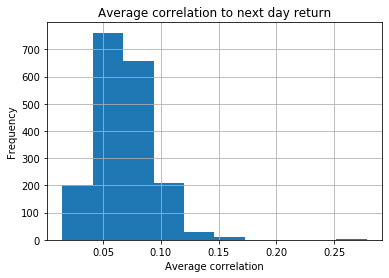

In [23]:
# Histogram of values of average correlation to next day return
corr_val.avgcorr.hist();
plt.xlabel("Average correlation")
plt.ylabel("Frequency")
plt.title("Average correlation to next day return")
plt.show()

Based on the histogram above, we can see that there are very few symbols with good correlation to next day values. For high profitability, we are taking the symbols that possess good predictive power.
Let's consider the tickers with average correlation of more than the 90%.

In [24]:
sym90 = corr_val[corr_val.avgcorr > corr_val.avgcorr.quantile(0.90)].symbol.values

open_val = open_val[sym90]
high_val = high_val[sym90]
low_val = low_val[sym90]
close_val = close_val[sym90]
volume = volume[sym90]
next_val = next_val[sym90]
ret_val = ret_val[sym90]
hl_val = hl_val [sym90]

In [25]:
# Modify original dataframes

close_val = close_val.fillna(method="ffill") # close
close_val = close_val.fillna(method="bfill") # to handle the first row of close
volume = volume.applymap(lambda x: 0 if pd.isna(x) is True else x) # volume
open_val = open_val.fillna(close_val)
high_val = high_val.fillna(close_val)
low_val = low_val.fillna(close_val)

# calculate other dataframes
next_val = (close_val.shift(-1) / close_val) - 1 # future return
ret_val = (close_val / close_val.shift(1)) - 1 # return
hl_val = high_val / low_val # high/low

## Technical Analysis

We want to create features that possess some level of predictive power which could indicate the future direction of the market. Statistically, these features should have good correlation  power to the market movement.

There are many such transformations in Statistics. 

According to work by Borovkova, some of the key technical indicators that can be used are categorised into four groups, Momentum, Trend, Volume and Volatility. Some of the commonly used indicators are:

#### Momentum:-

    1. Money flow index 
    2. Relative strength index
    3. Stochastic oscillator
    4. William %R
    
#### Trend:-

    1. Exponential moving average
    2. Moving average convergence-divergence
    3. Commodity channel index
    4. Ichimoku Indicator
    
#### Volume:-

    1. Accumulation/distribution index
    
#### Volatility:-

    1. Bollinger bands 

# Technical Analysis package

import ta

##### 1. Money flow index

In [25]:
import ta

In [26]:
mfi = pd.DataFrame()

for Symbol in close_val.columns:
    
    temp = ta.momentum.money_flow_index(high=high_val[Symbol], low=low_val[Symbol], close=close_val[Symbol], volume=volume[Symbol], fillna=True)
    mfi = pd.concat([mfi, temp], axis=1,sort=True)

# renaming the columns
mfi.columns = close_val.columns

##### 2. Relative Strength Index

In [27]:
rsi = close_val.apply(ta.momentum.rsi, fillna=True)

##### 3. Stochastic oscillator

In [28]:
stoch_k = pd.DataFrame()
stoch_d = pd.DataFrame()

for Symbol in close_val.columns:
    temp = ta.momentum.stoch(high=high_val[Symbol], low=low_val[Symbol], close=close_val[Symbol], fillna=True)
    stoch_k = pd.concat([stoch_k, temp], axis=1,sort=True)
    
    temp = ta.momentum.stoch_signal(high=high_val[Symbol], low=low_val[Symbol], close=close_val[Symbol], fillna=True)
    stoch_d = pd.concat([stoch_d, temp], axis=1,sort=True)

# renaming the columns
stoch_k.columns = close_val.columns
stoch_d.columns = close_val.columns

##### 4. William %R

In [29]:
will_r = pd.DataFrame()

for Symbol in close_val.columns:
    temp = ta.momentum.wr(high=high_val[Symbol], low=low_val[Symbol], close=close_val[Symbol], fillna=True)
    will_r = pd.concat([will_r, temp], axis=1,sort=True)

# renaming the columns
will_r.columns = close_val.columns

##### 5. Exponential moving average

In [30]:
ema = close_val.apply(ta.trend.ema_indicator, fillna=True)

##### 6. Moving average convergence-divergence

In [31]:
macd = close_val.apply(ta.trend.macd_diff, fillna=True)

##### 7. Commodity channel index

In [32]:
cci = pd.DataFrame()

for Symbol in close_val.columns:
    temp = ta.trend.cci(high=high_val[Symbol], low=low_val[Symbol], close=close_val[Symbol], fillna=True)
    cci = pd.concat([cci, temp], axis=1, sort=True)

# renaming the columns
cci.columns = close_val.columns

##### 8. Ichimoku Indicator

In [34]:
ichi_a = pd.DataFrame()
ichi_b = pd.DataFrame()

for Symbol in close_val.columns:
    temp = ta.trend.ichimoku_a(high=high_val[Symbol], low=low_val[Symbol], fillna=True)
    ichi_a = pd.concat([ichi_a, temp], axis=1, sort=True)

    temp = ta.trend.ichimoku_b(high=high_val[Symbol], low=low_val[Symbol], fillna=True)
    ichi_b = pd.concat([ichi_b, temp], axis=1, sort=True)

# renaming the columns
ichi_a.columns = close_val.columns
ichi_b.columns = close_val.columns

##### 9. Accumulation/distribution index

In [36]:
ad = pd.DataFrame()

for Symbol in close_val.columns:
    temp = ta.volume.acc_dist_index(high=high_val[Symbol], low=low_val[Symbol], close=close_val[Symbol], volume=volume[Symbol],fillna=True)
    ad = pd.concat([ad, temp], axis=1, sort=True)

# renaming the columns
ad.columns = close_val.columns

##### 10. Bollinger bands

In [37]:
bb_up = close_val.apply(ta.volatility.bollinger_hband, fillna=True)
bb_down = close_val.apply(ta.volatility.bollinger_lband, fillna=True)

## Data Analysis

In [38]:
# Listing all the above needed dataframes

dfois = [open_val, high_val, low_val, close_val,volume, ret_val, hl_val,
         mfi, ema, rsi, stoch_k, stoch_d, macd, will_r, cci,
         ichi_a, ichi_b, ad, bb_up, bb_down, next_val]
dfois_str = ['open', 'high', 'low', 'close', 'volume', 'rtn', 'hl','mfi', 'ema', 'rsi', 'stoch_k', 'stoch_d', 'macd', 
             'will_r', 'cci', 'ichi_a', 'ichi_b', 'ad', 'bb_up', 'bb_down', 'next_val']

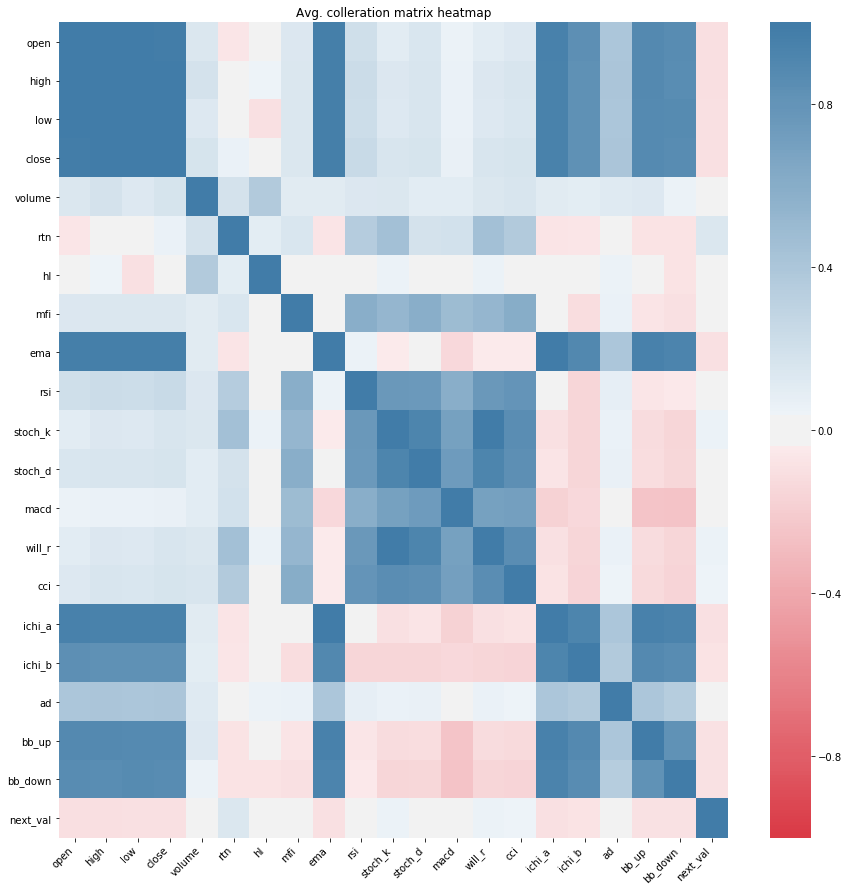

In [40]:
import seaborn as sns

corr_val = np.empty([len(dfois),len(dfois)])

# Loop over every dataframe and find correlation

for i, df1 in enumerate(dfois):
    for j, df2 in enumerate(dfois):
        corr_val[i][j] = df1.corrwith(df2).mean()
    
fig, ax = plt.subplots(figsize=(15,15))
df_corr = pd.DataFrame(corr_val, columns=dfois_str, index=dfois_str)

# Heatmap using seaborn

sns.heatmap(df_corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(10, 240, n=500), ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

ax.set_title('Avg. colleration matrix heatmap');

In additian to the correlation matrix heatmap, let's have a look at the histogram of data to look for outliers. we will normalise the data from 0 to 1 for every ticker so that they can be visualised and benchmarked appropriately.

/home/nielit/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nielit/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


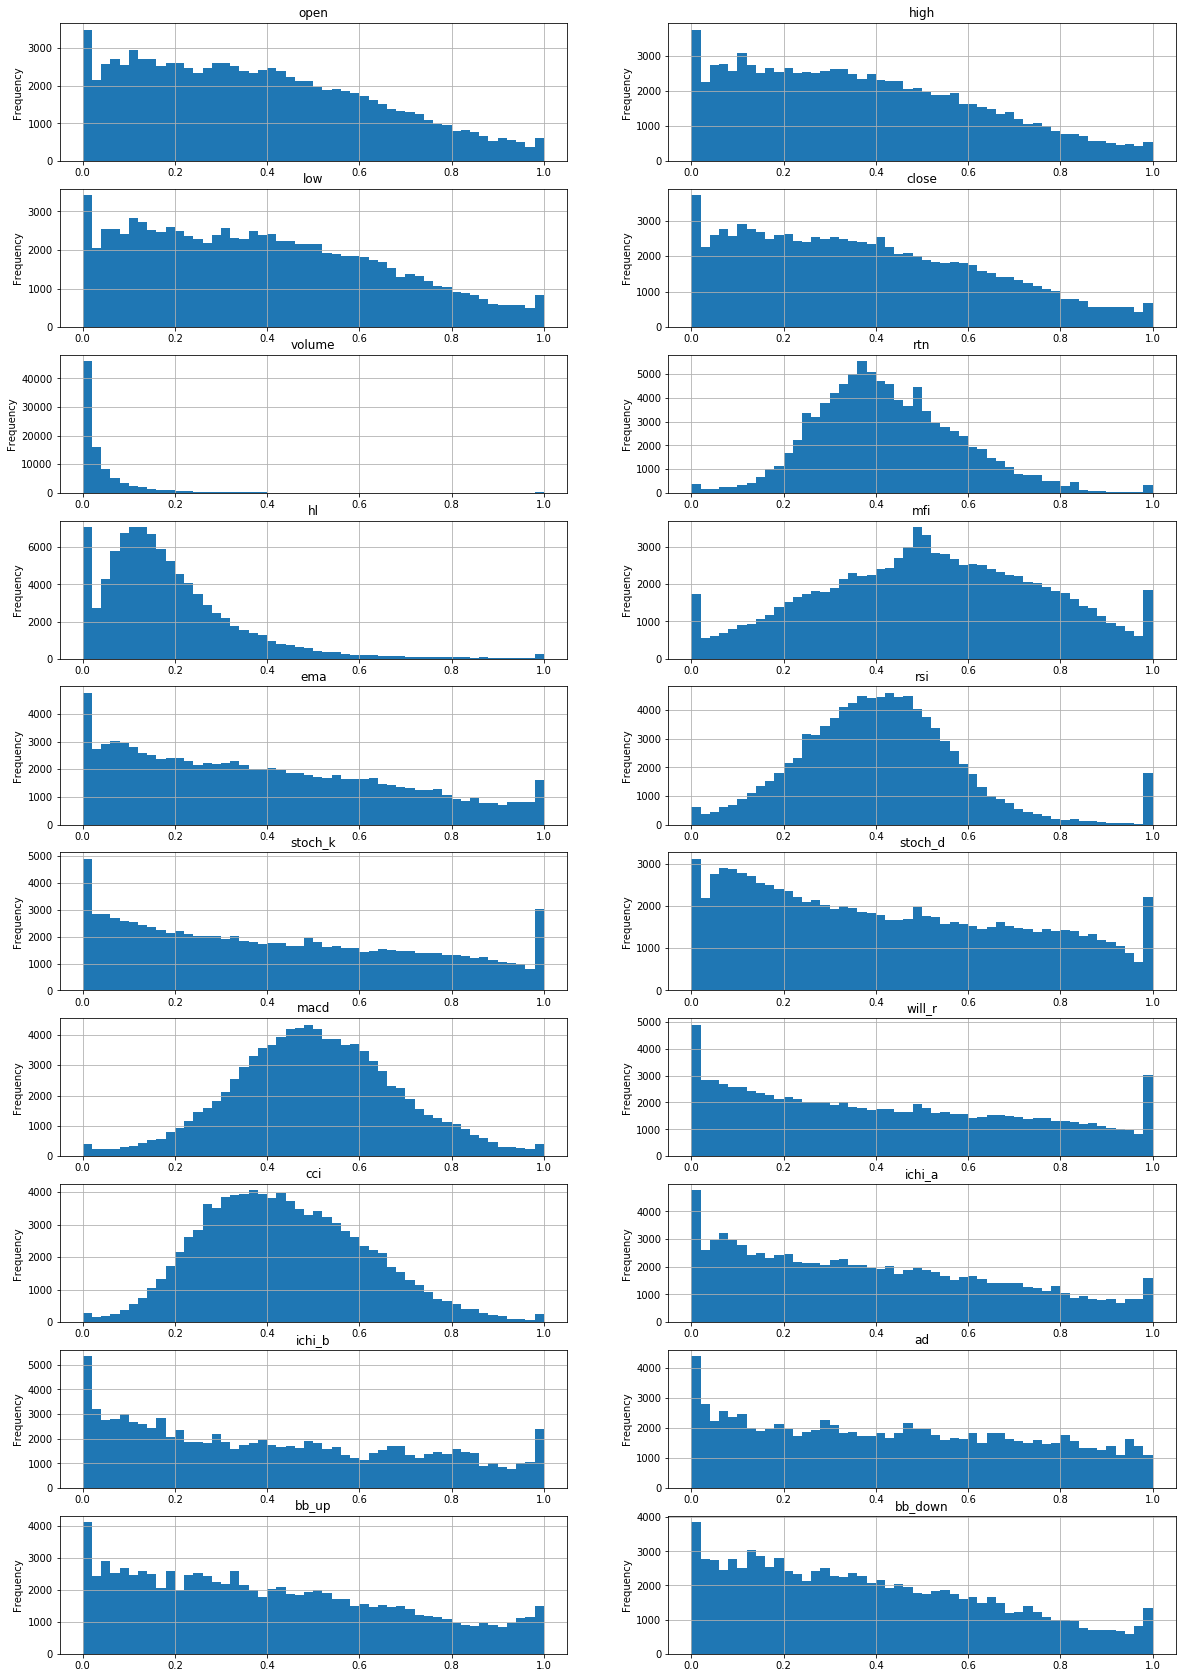

In [41]:
from sklearn import preprocessing

# Normalise and draw subplots for each feature

fig, axs = plt.subplots(10,2, figsize=(20, 30))   
for i, ax in enumerate(axs.flatten()):
    if i >= 20:
        pass
    else:
        nomaliser = preprocessing.MinMaxScaler(feature_range=(0,1))
        df_val = nomaliser.fit_transform(dfois[i])
        ax.hist(df_val.reshape(df_val.shape[0]*df_val.shape[1]), bins=50)
        ax.set_title(dfois_str[i])
        ax.set_ylabel('Frequency')
        ax.grid()

Analysing the correlation heatmap and histograms above.

Open, high, low and close values are highly correlated to each other. This is expected because the values are within close proximity to each other. As the technical indicators are calculated using these values and intrinsicly retain its information, open, high, and low values can be removed from feature list.

Most of the distributions above are either normal or uniform in shape, expect for hl and volume. This suggests that there will be a large number of outliers in those two features. Although the other features with normal distribution may have outliers in the tail section, they can be considered negligible. In addition, observing the correlation matrix, they also appear to have low correlation to future return, which is the metric we will be predicting. Therefore, it justifies to leave hl and volume out from the feature list.
Similarly, based on the correlation matrix heatmap, some values appear to not have much correlation to next day value. They are: mfi and ad. To keep the prediction model simple, these features can also be regarded as not useful.

Finally, it also appears that stoch_k is highly correlated to william_r. This is expected because the mathematical expression of both the indicators are similar. Here, william_r will be removed from the feature list.

Based on the discussion above, the final feature list would be: close, rtn, ema, rsi, stoch_k, stoch_d, macd, cci, ichi_a, ichi_b, bb_up, bb_down.

Our strategy is to predict the UP and DOWN movement of a stock together. Based on experience, this is a better strategy compared to predicting the direction of future return as the performance metric based on this can be misleading. For example, if we build a model that minimises the mean-squared-error, that still doesn't mean that the direction of the movement can be correct. If the actual movement is 0.1%, then investing based on 0.5% is better compared to -0.1% prediction although the later might have a error value.

Now, we first need to create a target dataframe that categorises into 1 and 0: 1 for UP and 0 for DOWN. Then, let us look at the distribution of the values.

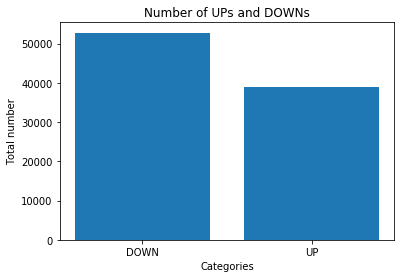

In [42]:
# Create target dataframe
df_target = (next_val > 0).astype(int)

# Look at the proportion
values, counts = np.unique(df_target.values.reshape(df_target.shape[0]*df_target.shape[1]), return_counts=True)
plt.bar(values,counts,tick_label=['DOWN','UP'])
plt.title('Number of UPs and DOWNs')
plt.ylabel('Total number')
plt.xlabel('Categories')
plt.show()

In [43]:
# List all the dataframes of interest
dfois = [close_val, ret_val, ema, rsi, stoch_k, stoch_d, macd, cci, ichi_a, ichi_b, bb_up, bb_down, df_target]
dfois_str = ['close', 'rtn', 'ema', 'rsi', 'stoch_k', 'stoch_d', 'macd', 'cci','ichi_a', 'ichi_b', 'bb_up', 'bb_down', 'target']

Based on the analysis above, it appears that there are more DOWNs than UPs. Therefore, some balancing is required before sending the data for machine learning. Before going into forecasting section, the final list of dataframes should be defined based on the features list finalised earlier.

## Prediction

##### Pre-processing the data

Based on the Data Analysis done above, this section builds an LSTM neural network model for the prediction of the next day stock price moment; whether it is going upward or downward.

First, let's split the data to training, validation, and test sets. The training and validation sets will be using during the LSTM network training, while the test set will be used for trading strategy implementation and additional testing of the final model.

In [45]:
# Train set
dfois_train = []
for df in dfois:
    dfois_train.append(df.iloc[df.index < '2019-03-01'])

# Test set
dfois_test = []
for df in dfois:
    dfois_test.append(df.iloc[df.index >= '2019-08-01'])

# Validation set
dfois_eval = []
for df in dfois:
    dfois_eval.append(df.iloc[(df.index >= '2019-03-01') & (df.index < '2019-08-01')])

Next, let us preprocess the data. Let us normalise all the data to be between 0 and 1. Note that the maximum and minimum is with respect to each ticker in each train dataframe

In [46]:
# List of normalisers corresponding to each dataframe
nomalisers = []

for i, df in enumerate(dfois[:-1]):
    # create the normaliser object
    nomalisers.append(preprocessing.MinMaxScaler(feature_range=(0,1)))
    
    # columns and indexes
    columns = dfois_train[i].columns
    index_train = dfois_train[i].index
    index_test = dfois_test[i].index
    index_eval = dfois_eval[i].index
    
    # fit normalise
    nomalisers[i].fit(dfois_train[i])
    
    # trasform
    train_data = nomalisers[i].transform(dfois_train[i])
    eval_data = nomalisers[i].transform(dfois_eval[i])
    test_data = nomalisers[i].transform(dfois_test[i])
    
    # replace list
    dfois_train[i] = pd.DataFrame(train_data, columns=columns, index=index_train)
    dfois_eval[i] = pd.DataFrame(eval_data, columns=columns, index=index_eval)
    dfois_test[i] = pd.DataFrame(test_data, columns=columns, index=index_test)

Now, let us scale the data to have mean 0 and unit variance. This scaling is done by training the scaler using data of entire normalised training dataframe. This will be used to transform the training, validation, and test sets.

In [47]:
# List of scalers corresponding to each dataframe
scalers = []

# Standardise the data by fitting the train set
for i, _ in enumerate(dfois[:-1]):
    # create the Scaler object
    scalers.append(preprocessing.StandardScaler())
    
    # columns and indexes
    columns = dfois_train[i].columns
    index_train = dfois_train[i].index
    index_test = dfois_test[i].index
    index_eval = dfois_eval[i].index
    
    # fit scale
    flat_arr = dfois_train[i].values.reshape(dfois_train[i].shape[0]*dfois_train[i].shape[1],1)
    scalers[i].fit(np.tile(flat_arr, dfois_train[i].shape[1]))
    
    # trasform
    train_data = scalers[i].transform(dfois_train[i])
    eval_data = scalers[i].transform(dfois_eval[i])
    test_data = scalers[i].transform(dfois_test[i])
    
    # replace list
    dfois_train[i] = pd.DataFrame(train_data, columns=columns, index=index_train)
    dfois_eval[i] = pd.DataFrame(eval_data, columns=columns, index=index_eval)
    dfois_test[i] = pd.DataFrame(test_data, columns=columns, index=index_test)

##### 60 Time Steps

Let's sequence the data. We are going to use the past 60 days of data for the next day prediction, we need to append the past 60 days worth data and append them in an array. We first write a function and execute onto all three sets of data.

In [48]:
from collections import deque
import random

# Look at the past 60 days
SEQ_LEN = 60

def sequence_data(df_list, shuffle=True):
    # list containing the data
    sequential_data = []

    for Symbol in close_val.columns:
        # initialise dataframe
        df_ticker = pd.DataFrame()

        # concatenate the dataframes
        for df in df_list:
            df_ticker = pd.concat([df_ticker, df[Symbol]], axis=1)

        prev_days = deque(maxlen=SEQ_LEN)
        # for values in every row
        for i in df_ticker.values: 
            # remove the targets
            prev_days.append([n for n in i[:-1]])  
            # append when sequence length is reached
            if len(prev_days) == SEQ_LEN: 
                sequential_data.append([np.array(prev_days), i[-1]])
                
        # shuffle - we do not need to do this for test set
        if shuffle == True:
            random.shuffle(sequential_data)

    return sequential_data

In [49]:
sequential_data_train = sequence_data(dfois_train)
sequential_data_eval = sequence_data(dfois_eval)
sequential_data_test = sequence_data(dfois_test, shuffle=False) # do not shuffle just this one

# Print the length
print('Training data length: {}'.format(len(sequential_data_train)))
print('Validation data length: {}'.format(len(sequential_data_eval)))
print('Testing data length: {}'.format(len(sequential_data_test)))

/home/nielit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Training data length: 42864
Validation data length: 7896
Testing data length: 7708


In [50]:
# balance train and evaluation data
def balance_data(sequential_data):
    ups = [] 
    downs = [] 
    
    # separate the sequence into ups and downs
    for seq, target in sequential_data:
        if target == 0:
            downs.append([seq, target])
        elif target == 1:
            ups.append([seq, target])
    
    # shuffle to randomise
    random.shuffle(ups)
    random.shuffle(downs)
    
    # get the shorter length
    lower = min(len(ups), len(downs))
    
    # truncate the list to shorter length
    ups = ups[:lower]
    downs = downs[:lower]
    
    # merge and shuffle
    sequential_data = ups+downs
    random.shuffle(sequential_data)
    
    return sequential_data

In [51]:
# separate train and target data
def separate_data(sequential_data):
    X = []
    y = []
    
    # loop over every row in sequential data
    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)

    return np.array(X), y

In [52]:
# perform balancing by calling the function
train_x, train_y = separate_data(balance_data(sequential_data_train))
validation_x, validation_y = separate_data(balance_data(sequential_data_eval))

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, ModelCheckpoint

In [56]:
# Batch size and epochs
BATCH_SIZE = 512
EPOCHS = 3

# Build LSTM prediction model
model = Sequential()

model.add(LSTM(128, input_shape=(train_x.shape[1:]), activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(lr=0.001, decay=1e-6),
              metrics=['accuracy'])

# Model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 128)           72192     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 60, 128)           512       
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 128)           131584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 60, 128)           512       
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)              

In [57]:
history = model.fit(train_x, train_y,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(validation_x, validation_y))

Train on 36910 samples, validate on 5848 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/3
36910/36910 [==============================] - 232s 6ms/sample - loss: nan - acc: 0.5000 - val_loss: nan - val_acc: 0.5000
Epoch 2/3
36910/36910 [==============================] - 178s 5ms/sample - loss: nan - acc: 0.5000 - val_loss: nan - val_acc: 0.5000
Epoch 3/3
36910/36910 [==============================] - 176s 5ms/sample - loss: nan - acc: 0.5000 - val_loss: nan - val_acc: 0.5000


In [58]:
# save the model
model.save("lstm.l1")

In [ ]:
# load the model
model = load_model("lstm.l1")

Let's look at the accuracy based on the test dataset as well as the classification report based on the 2018/2019 data which the model has never seen during training.

In [60]:
from sklearn.metrics import classification_report

# test performance using test set
test_x, test_y = separate_data(sequential_data_test)

# get the prediction
pred = model.predict_classes(test_x)

# get prediction probability
pred_proba = model.predict(test_x)

# accuracy using test
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('')

# classification report
print('Classification report:')
print(classification_report(test_y, pred))

Test loss: nan
Test accuracy: 0.56227297

Classification report:
              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72      4334
         1.0       0.00      0.00      0.00      3374

    accuracy                           0.56      7708
   macro avg       0.28      0.50      0.36      7708
weighted avg       0.32      0.56      0.40      7708



/home/nielit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Trading strategy

Let us define a simple trading strategy. Of all 188 tickers used, open position using $1 for each ticker based on the predicted movement by the LSTM network, and close position the next day. This means that everyday, an investment of $150 is made and position must be closed the next day.

Note that, as the LSTM network requires 60 days of past data, the trading is simulated from 2019-08-01. The cumulative profit and loss (PnL) will be plotted.

The accuracy score based on the test set shows that the results are in line with research whereby the accuracy on test set is lower than that of the training and validation set. The prediction of upward movement has low precision compared to that of the downward trend, which means that there are more false positives when predicting the upward movement. Often, the recall score is inversely proportional to the precision. Therefore, the best measure is the f1-score, which is acceptable for developing a trading strategy.

In [131]:
# build index list
pred_index = dfois_test[0].index[dfois_test[0].index >= dfois_test[0].head(60).index[-1]]

# build prediction dataframe - 1 is BUY and 0 is SELL
df_pred = pd.DataFrame(pred.reshape(dfois_test[0].shape[0]-SEQ_LEN+1,dfois_test[0].shape[1], order='F'),
                       index = pred_index,
                       columns = dfois_test[0].columns)

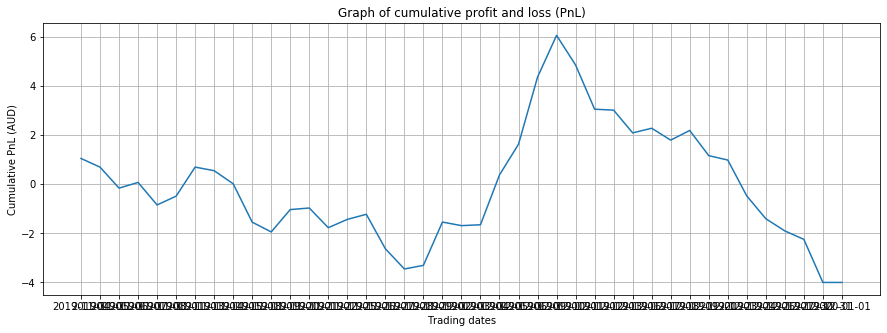

In [191]:
# dataframe for right prediction - 1 is CORRECT and 0 is WRONG
df_right = (df_pred.astype(bool) == df_target.loc[pred_index].astype(bool)).astype(int)

# dataframe for wrong prediction - 1 is WRONG and 0 is CORRECT
df_wrong = (~df_right.astype(bool)).astype(int)

# datframe for profit
df_profit = df_right*next_val.loc[pred_index].abs()

# dataframe for loss
df_loss = df_wrong*next_val.loc[pred_index].abs()

plt.subplots(figsize=(15,5))
plt.plot((df_profit.sum(axis=1) - df_loss.sum(axis=1)).cumsum())
plt.grid()
plt.xlabel('Trading dates')
plt.ylabel('Cumulative PnL (AUD)')
plt.title('Graph of cumulative profit and loss (PnL)')
plt.show()



In [205]:
df_right

Symbol,AARTIDRUGS.BO,AARTIDRUGS.NS,AARVEEDEN.BO,AAVAS.NS,ABANSENT.BO,ABB.NS,ADANIPORTS.BO,ADANIPORTS.NS,AIAENG.BO,AKZOINDIA.NS,...,VISHNU.BO,VRETAIL.NS,WABAG.BO,WABCOINDIA.NS,WEIZFOREX.BO,WEIZFOREX.NS,WINSOMTX.BO,ZEELEARN.BO,ZEEMEDIA.NS,ZENSARTECH.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-04,1,1,1,0,1,1,1,1,1,1,...,1,0,1,1,1,0,1,0,0,1
2019-11-05,0,1,1,1,1,0,0,0,1,0,...,1,0,0,1,1,1,1,0,0,1
2019-11-06,0,1,1,0,1,0,1,1,0,1,...,0,0,1,0,1,1,1,0,1,1
2019-11-07,1,1,1,1,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
2019-11-08,0,1,1,1,1,1,0,0,0,0,...,0,0,1,1,1,1,0,0,1,1
2019-11-11,0,1,1,1,1,0,1,1,1,1,...,1,0,0,1,1,1,0,0,1,1
2019-11-13,1,1,1,1,1,1,1,1,0,1,...,1,0,1,0,1,1,1,1,0,0
2019-11-14,1,1,1,0,1,1,1,1,1,0,...,0,0,1,0,1,1,1,1,0,0
2019-11-15,0,0,1,0,1,1,1,1,0,0,...,1,0,0,0,1,1,1,1,0,1


In [197]:
dfois_test.sum(axis=1)

AttributeError: 'list' object has no attribute 'sum'

In [198]:
aa = close_val.tail(41)
aa

Symbol,AARTIDRUGS.BO,AARTIDRUGS.NS,AARVEEDEN.BO,AAVAS.NS,ABANSENT.BO,ABB.NS,ADANIPORTS.BO,ADANIPORTS.NS,AIAENG.BO,AKZOINDIA.NS,...,VISHNU.BO,VRETAIL.NS,WABAG.BO,WABCOINDIA.NS,WEIZFOREX.BO,WEIZFOREX.NS,WINSOMTX.BO,ZEELEARN.BO,ZEEMEDIA.NS,ZENSARTECH.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-04,97.650002,29.200001,6.750000,1500.849976,28.650000,1456.699951,390.950012,391.000000,254.600006,90.800003,...,9.39,101.449997,242.699997,692.700012,28.700001,86.099998,1.65,8.26,43.700001,887.349976
2019-11-05,97.449997,29.150000,6.750000,1501.050049,27.000000,1448.349976,389.750000,390.000000,249.000000,88.800003,...,9.12,103.500000,239.050003,671.500000,27.049999,87.099998,1.60,9.10,45.849998,872.000000
2019-11-06,97.900002,27.650000,6.750000,1452.800049,26.600000,1461.750000,390.600006,391.000000,248.800003,88.900002,...,8.93,105.949997,245.149994,668.299988,26.799999,86.550003,1.55,9.55,48.099998,855.799988
2019-11-07,100.449997,27.299999,6.750000,1463.849976,26.150000,1482.750000,390.399994,390.450012,254.850006,87.849998,...,9.29,111.199997,244.050003,686.549988,26.200001,85.699997,1.50,10.02,45.700001,851.049988
2019-11-08,100.400002,27.100000,6.750000,1454.650024,26.150000,1462.699951,386.000000,386.149994,257.549988,85.800003,...,8.96,116.599998,238.699997,675.000000,26.250000,85.050003,1.55,10.52,43.450001,858.000000
2019-11-11,101.000000,26.900000,6.750000,1447.750000,26.049999,1457.349976,387.549988,387.899994,259.549988,91.449997,...,9.08,122.400002,235.000000,671.599976,26.100000,83.699997,1.60,11.04,43.450001,849.849976
2019-11-13,103.150002,26.150000,6.750000,1429.349976,25.900000,1497.650024,370.649994,370.799988,259.250000,87.150002,...,8.85,128.500000,243.750000,669.049988,26.100000,83.349998,1.65,11.59,43.349998,808.250000
2019-11-14,102.550003,26.049999,6.750000,1413.099976,25.150000,1468.900024,368.700012,369.100006,260.700012,85.949997,...,8.80,134.899994,243.600006,700.200012,25.100000,78.599998,1.60,11.02,45.500000,833.049988
2019-11-15,102.500000,25.850000,6.750000,1421.800049,23.350000,1466.349976,366.399994,366.299988,260.250000,87.099998,...,8.99,141.600006,237.850006,730.750000,23.400000,78.500000,1.55,10.47,46.450001,870.500000


In [201]:
a = np.sum(aa,axis=1)
a

Date
2019-11-04    59222.160036
2019-11-05    58763.310292
2019-11-06    58818.348215
2019-11-07    58941.293316
2019-11-08    58579.297704
2019-11-11    58323.789891
2019-11-13    57951.515111
2019-11-14    57979.927870
2019-11-15    58255.822341
2019-11-18    58031.366820
2019-11-19    57990.402060
2019-11-20    58273.212901
2019-11-21    57828.105174
2019-11-22    57693.030436
2019-11-25    57918.880013
2019-11-26    57594.472966
2019-11-27    57454.742948
2019-11-28    57546.252653
2019-11-29    57765.219950
2019-12-02    57554.906912
2019-12-03    57262.217984
2019-12-04    57256.316855
2019-12-05    57140.252317
2019-12-06    56795.097172
2019-12-09    56804.237103
2019-12-10    56624.402228
2019-12-11    56525.522167
2019-12-12    56826.707926
2019-12-13    57288.499898
2019-12-16    57012.616705
2019-12-17    57099.719796
2019-12-18    57055.882893
2019-12-19    57372.109923
2019-12-20    57055.099961
2019-12-23    57351.590200
2019-12-24    57503.739718
2019-12-26    57537.280

In [188]:
from sklearn.preprocessing import MinMaxScaler

series = a
values = series.values
values = values.reshape((len(values), 1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)


In [189]:
normalized

array([[1.        ],
       [0.82984377],
       [0.8502536 ],
       [0.89584559],
       [0.76160598],
       [0.66685547],
       [0.52880402],
       [0.53934038],
       [0.64165092],
       [0.5584156 ],
       [0.54322455],
       [0.6480999 ],
       [0.48303965],
       [0.43294959],
       [0.51670188],
       [0.39640132],
       [0.34458493],
       [0.37851967],
       [0.45971979],
       [0.38172895],
       [0.27319049],
       [0.27100216],
       [0.2279617 ],
       [0.09996708],
       [0.10335646],
       [0.0366679 ],
       [0.        ],
       [0.11168936],
       [0.28293667],
       [0.18063031],
       [0.21293094],
       [0.1966748 ],
       [0.31394195],
       [0.19638447],
       [0.30633258],
       [0.36275451],
       [0.37519246],
       [0.50153484],
       [0.62213687],
       [0.69677425],
       [0.71673622]])

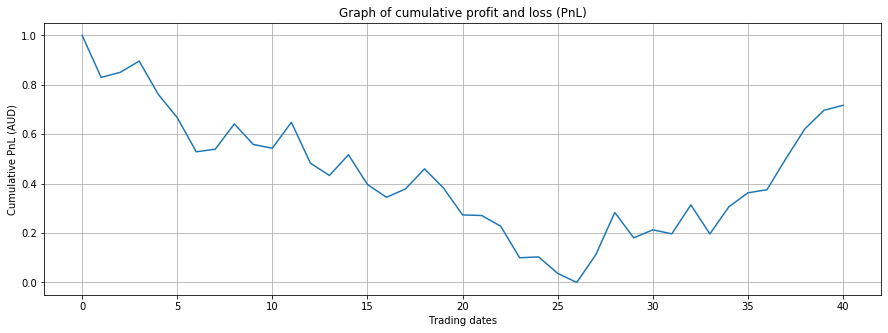

In [190]:
plt.subplots(figsize=(15,5))
plt.plot(normalized)
plt.grid()
plt.xlabel('Trading dates')
plt.ylabel('Cumulative PnL (AUD)')
plt.title('Graph of cumulative profit and loss (PnL)')
plt.show()

In [125]:
close_val.tail(41)

Symbol,AARTIDRUGS.BO,AARTIDRUGS.NS,AARVEEDEN.BO,AAVAS.NS,ABANSENT.BO,ABB.NS,ADANIPORTS.BO,ADANIPORTS.NS,AIAENG.BO,AKZOINDIA.NS,...,VISHNU.BO,VRETAIL.NS,WABAG.BO,WABCOINDIA.NS,WEIZFOREX.BO,WEIZFOREX.NS,WINSOMTX.BO,ZEELEARN.BO,ZEEMEDIA.NS,ZENSARTECH.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-04,97.650002,29.200001,6.750000,1500.849976,28.650000,1456.699951,390.950012,391.000000,254.600006,90.800003,...,9.39,101.449997,242.699997,692.700012,28.700001,86.099998,1.65,8.26,43.700001,887.349976
2019-11-05,97.449997,29.150000,6.750000,1501.050049,27.000000,1448.349976,389.750000,390.000000,249.000000,88.800003,...,9.12,103.500000,239.050003,671.500000,27.049999,87.099998,1.60,9.10,45.849998,872.000000
2019-11-06,97.900002,27.650000,6.750000,1452.800049,26.600000,1461.750000,390.600006,391.000000,248.800003,88.900002,...,8.93,105.949997,245.149994,668.299988,26.799999,86.550003,1.55,9.55,48.099998,855.799988
2019-11-07,100.449997,27.299999,6.750000,1463.849976,26.150000,1482.750000,390.399994,390.450012,254.850006,87.849998,...,9.29,111.199997,244.050003,686.549988,26.200001,85.699997,1.50,10.02,45.700001,851.049988
2019-11-08,100.400002,27.100000,6.750000,1454.650024,26.150000,1462.699951,386.000000,386.149994,257.549988,85.800003,...,8.96,116.599998,238.699997,675.000000,26.250000,85.050003,1.55,10.52,43.450001,858.000000
2019-11-11,101.000000,26.900000,6.750000,1447.750000,26.049999,1457.349976,387.549988,387.899994,259.549988,91.449997,...,9.08,122.400002,235.000000,671.599976,26.100000,83.699997,1.60,11.04,43.450001,849.849976
2019-11-13,103.150002,26.150000,6.750000,1429.349976,25.900000,1497.650024,370.649994,370.799988,259.250000,87.150002,...,8.85,128.500000,243.750000,669.049988,26.100000,83.349998,1.65,11.59,43.349998,808.250000
2019-11-14,102.550003,26.049999,6.750000,1413.099976,25.150000,1468.900024,368.700012,369.100006,260.700012,85.949997,...,8.80,134.899994,243.600006,700.200012,25.100000,78.599998,1.60,11.02,45.500000,833.049988
2019-11-15,102.500000,25.850000,6.750000,1421.800049,23.350000,1466.349976,366.399994,366.299988,260.250000,87.099998,...,8.99,141.600006,237.850006,730.750000,23.400000,78.500000,1.55,10.47,46.450001,870.500000


In [84]:
df_profit- df_loss

Symbol,AARTIDRUGS.BO,AARTIDRUGS.NS,AARVEEDEN.BO,AAVAS.NS,ABANSENT.BO,ABB.NS,ADANIPORTS.BO,ADANIPORTS.NS,AIAENG.BO,AKZOINDIA.NS,...,VISHNU.BO,VRETAIL.NS,WABAG.BO,WABCOINDIA.NS,WEIZFOREX.BO,WEIZFOREX.NS,WINSOMTX.BO,ZEELEARN.BO,ZEEMEDIA.NS,ZENSARTECH.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-04,0.002048,0.001712,0.000000,-0.000133,0.057592,0.005732,0.003069,0.002558,0.021995,0.022026,...,0.028754,-0.020207,0.015039,0.030605,0.057491,-0.011614,0.030303,-0.101695,-0.049199,0.017299
2019-11-05,-0.004618,0.051458,0.000000,0.032144,0.014815,-0.009252,-0.002181,-0.002564,0.000803,-0.001126,...,0.020833,-0.023671,-0.025518,0.004765,0.009242,0.006315,0.031250,-0.049451,-0.049073,0.018578
2019-11-06,-0.026047,0.012658,0.000000,-0.007606,0.016917,-0.014366,0.000512,0.001407,-0.024317,0.011811,...,-0.040314,-0.049552,0.004487,-0.027308,0.022388,0.009821,0.032258,-0.049215,0.049896,0.005550
2019-11-07,0.000498,0.007326,0.000000,0.006285,0.000000,0.013522,0.011270,0.011013,-0.010594,0.023335,...,0.035522,-0.048561,0.021922,0.016823,-0.001908,0.007585,-0.033333,-0.049900,0.049234,-0.008166
2019-11-08,-0.005976,0.007380,0.000000,0.004743,0.003824,0.003658,-0.004016,-0.004532,-0.007765,-0.065851,...,-0.013393,-0.049743,0.015501,0.005037,0.005714,0.015873,-0.032258,-0.049430,0.000000,0.009499
2019-11-11,-0.021287,0.027881,0.000000,0.012709,0.005758,-0.027653,0.043607,0.044084,0.001156,0.047020,...,0.025330,-0.049837,-0.037234,0.003797,0.000000,0.004182,-0.031250,-0.049819,0.002302,0.048950
2019-11-13,0.005817,0.003824,0.000000,0.011369,0.028958,0.019197,0.005261,0.004585,-0.005593,0.013769,...,0.005650,-0.049805,0.000615,-0.046559,0.038314,0.056989,0.030303,0.049180,-0.049596,-0.030684
2019-11-14,0.000488,0.007677,0.000000,-0.006157,0.071571,0.001736,0.006238,0.007586,0.001726,-0.013380,...,-0.021591,-0.049667,0.023604,-0.043630,0.067729,0.001272,0.031250,0.049909,-0.020879,-0.044955
2019-11-15,-0.014634,-0.017408,0.000000,-0.005978,0.032120,0.007297,0.002183,0.001774,-0.018060,-0.012055,...,0.025584,-0.049788,-0.026067,-0.013137,0.036325,0.033121,0.032258,0.049666,-0.029063,0.014360


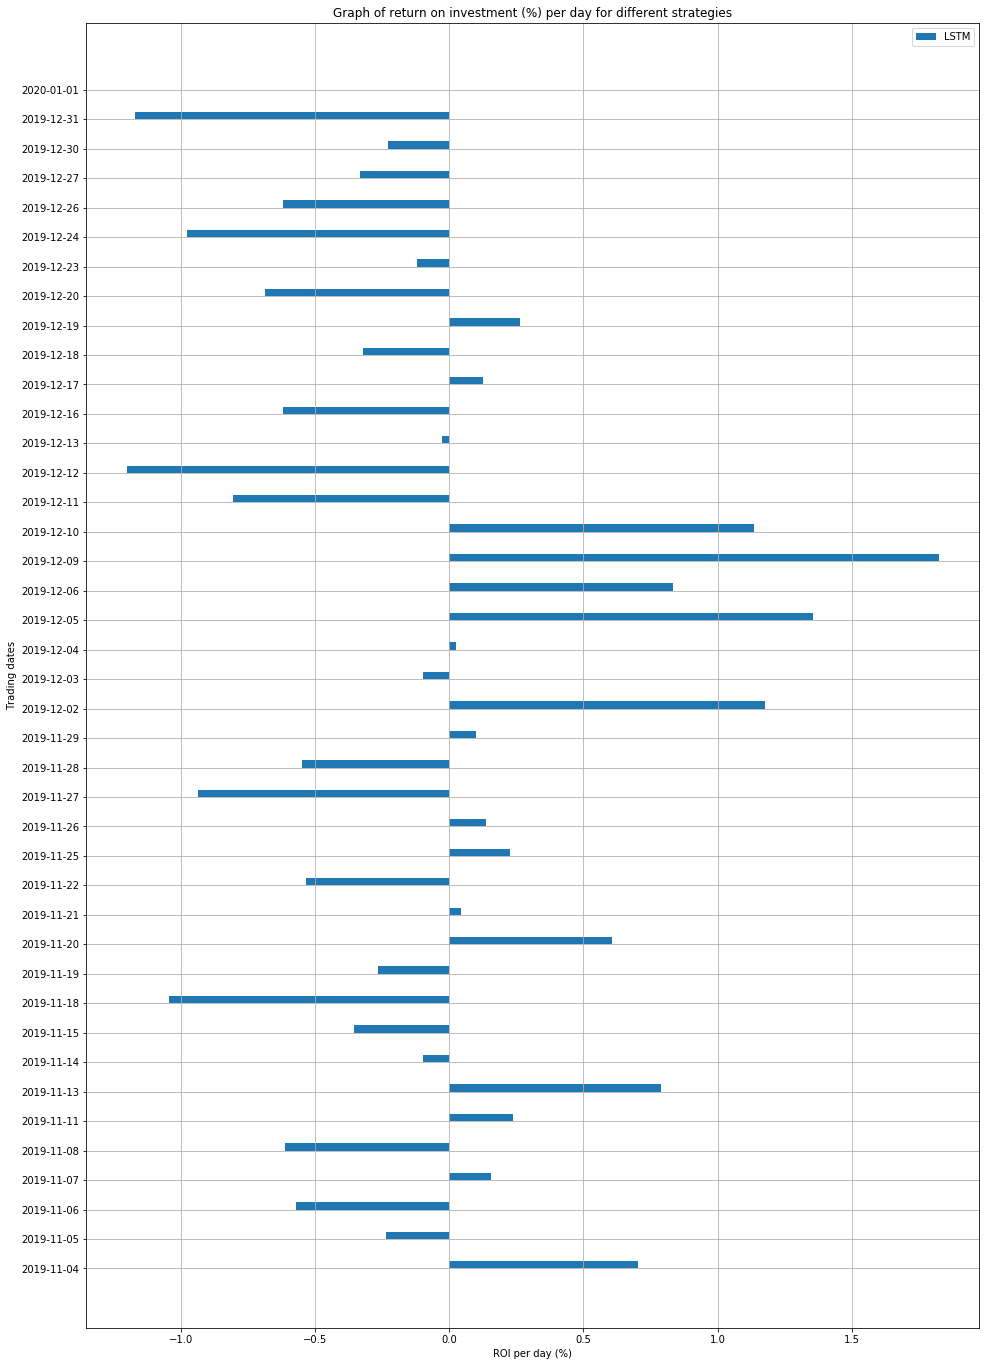

In [206]:
from datetime import timedelta

# pnl of lstm
pnl_lstm = (df_profit.sum(axis=1) - df_loss.sum(axis=1))

# plotting the roi per day
plt.subplots(figsize=(16, 24))
plt.barh((pnl_lstm/150*100).index,(pnl_lstm/150*100).values, label = "LSTM", align='edge', height=0.25)
plt.xlabel('ROI per day (%)')
plt.ylabel('Trading dates')
plt.title('Graph of return on investment (%) per day for different strategies')
plt.legend()
plt.grid()
plt.show()

Following the simple strategy, based on 40 days of trading and  188 𝑖𝑛𝑣𝑒𝑠𝑡𝑚𝑒𝑛𝑡 𝑝𝑒𝑟𝑑𝑎𝑦, 𝑡ℎ𝑒 𝑡𝑜𝑡𝑎𝑙 𝑝𝑟𝑜𝑓𝑖𝑡 𝑚𝑎𝑑𝑒 𝑖𝑠 𝑎𝑏𝑜𝑢𝑡 6. Considering the numbers and the linear trend of the cumulative PnL, I would say that this is a successful strategy.

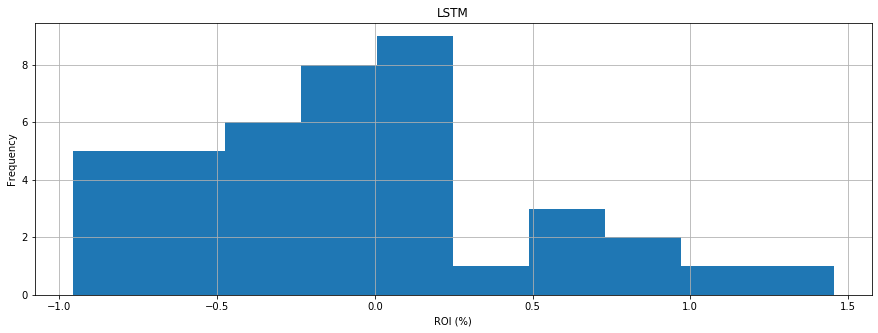

In [210]:
fig, (ax1) = plt.subplots(1,1, figsize=(15, 5), sharey=True)   

ax1.hist((pnl_lstm/188*100).values, bins=10)
ax1.set_title("LSTM")
ax1.set_ylabel('Frequency')
ax1.set_xlabel('ROI (%)')
ax1.grid()

In [214]:
from scipy import stats

# calculating the confidence
conf_lstm = stats.percentileofscore((pnl_lstm/188*100).values, 2) - stats.percentileofscore((pnl_lstm/188*100).values, 0)

print('Confidence of employed approaches in making positive ROI based on test set:')
print('LSTM: {}%'.format(conf_lstm))

Confidence of employed approaches in making positive ROI based on test set:
LSTM: 41.46341463414634%
